# 🧠 NutriNova  
### *Smarter Food Insights for Healthier Innovation*

Welcome to **NutriNova**, a data-driven project aimed at uncovering nutritional insights from real-world packaged food data. With the growing demand for healthier and more sustainable food products, NutriNova explores how **AI and data analytics** can support product innovation, transparency, and decision-making in the food industry.

This project leverages the **Open Food Facts** dataset — a collaborative, open-source food product database containing **ingredients**, **nutritional values**, **additive and allergen information**, and more — to analyze current food trends, identify potential nutritional gaps, and support **R&D efforts** for healthier product alternatives.

Whether you're a food scientist, a data enthusiast, or part of a food-tech innovation team, NutriNova demonstrates how **smart data can power smarter food**.



## 🔁 Project Methodology – CRISP-DM

We follow the **CRISP-DM** (Cross-Industry Standard Process for Data Mining) approach to structure this project:

1. **Business Understanding** – Define the problem & goals.
2. **Data Understanding** – Load & explore the dataset.
3. **Data Preparation** – Clean and filter the necessary columns.
4. **Modeling** – Apply basic analysis or clustering techniques.
5. **Evaluation** – Draw insights and evaluate patterns.
6. **Deployment** – (Optional) Discuss real-world application or automation ideas.


## 🧩 Problem Statement

In today’s health-conscious and innovation-driven food industry, manufacturers face growing pressure to create products that are not only appealing and cost-effective, but also nutritionally balanced, transparent in labeling, and free from harmful additives.

However, the vast diversity of packaged food products and the complexity of nutritional data make it difficult to:
- Identify patterns in ingredients and nutrient composition,3

- Detect common additives and unhealthy trends,
- Guide the formulation of healthier, innovative alternatives.

**NutriNova** aims to bridge this gap using real-world food product data and AI-driven analysis. By leveraging the principles of data science and Design of Experiments (DoE), the project seeks to extract actionable insights from large-scale food product data to support:
- Accelerated product development,
- Nutritional benchmarking,
- Process optimization in R&D.

---

## 📦 Dataset Overview: Open Food Facts

This project utilizes the **Open Food Facts** dataset — a collaborative, crowd-sourced database of over **600,000 food products** from more than 150 countries. The data is open, extensive, and continuously updated by thousands of contributors.

- **Source**: [Open Food Facts - World](https://www.kaggle.com/datasets/openfoodfacts/world-food-facts)  
- **License**: Open Data — freely usable for research, education, and commercial purposes  
- **Format**: `.tsv` (Tab-Separated Values)  
- **Size**: ~963 MB  
- **Structure**: A single large table with rich details for each product  

### 🔑 Key Columns
- **Product Details**: `product_name`, `brands`, `quantity`, `categories`, `labels`  
- **Ingredients & Allergens**: `ingredients_text`, `additives`, `allergens`  
- **Nutrition Info (per 100g)**: `energy_100g`, `fat_100g`, `sugars_100g`, `salt_100g`, `proteins_100g`, `fiber_100g`  
- **Health Indicators**: `nutrition_grade_fr`, `nutrition_score_fr_100g`, `ingredients_from_palm_oil_n`  
- **Additional Fields**: `countries_en`, `packaging`, `image_url`, `main_category_en`, `pnns_groups_1`, `pnns_groups_2`  

---

## ℹ️ About Open Food Facts

Open Food Facts is a free, open, and collaborative database created by over 5,000 contributors. It supports transparency in food systems and is widely used in AI and research applications related to health, sustainability, and food-tech innovation.



## 🧹 Step 1: Data Loading & Initial Exploration

Before diving into analysis or modeling, we first load the dataset and perform some basic exploration to understand its structure and data quality. This step helps identify:

- Missing or inconsistent values  
- Redundant or irrelevant columns  
- High-cardinality categorical features  
- Common formatting issues

We'll be using **Pandas** for data manipulation and **Seaborn / Matplotlib** for initial visual diagnostics.


In [1]:
import pandas as pd

# Load the TSV file
df = pd.read_csv(r"F:\Aswin\01 epita\Interview Prep\ESPAUK\New food innovation pvt\Project\dataset\en.openfoodfacts.org.products.tsv", sep="\t", low_memory=False)

# Save as CSV
df.to_csv("openfoodfacts_data.csv", index=False)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust display settings for readability
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Load dataset
df = pd.read_csv(r"F:\Aswin\01 epita\Interview Prep\ESPAUK\New food innovation pvt\Project\dataset\en.openfoodfacts.org.products.tsv", sep='\t', low_memory=False)


# Preview the dataset
df.head()


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,...,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,0.00000,0.000,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,NaN,28 g (0.25 cup),NaN,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,NaN,NaN,NaN,28 g (0.25 cup),NaN,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,N

In [2]:
# Dataset shape and basic info
print(f"Dataset contains {df.shape[0]:,} rows and {df.shape[1]:,} columns.")
df.info()


Dataset contains 356,027 rows and 163 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


### 🔍 Dataset Overview

- **Rows**: 356,027 food products  
- **Columns**: 163 features (nutritional values, ingredients, labels, etc.)
- **Data Types**:  
  - 107 numeric (mostly nutritional values)  
  - 56 object (categorical/text data)

💡 The dataset is **high-dimensional**, with many detailed features. We'll need to:
- Identify relevant columns for our analysis,
- Handle missing values (especially in nutrition fields),
- Possibly reduce dimensionality for performance and clarity.


## 🔍 Missing Data Analysis
Understanding missing data is a crucial part of any data preprocessing pipeline. It helps us identify:

Columns or rows with excessive missing values.

Patterns of missingness (random or systematic).

Whether to drop or impute missing values.

Columns that may be unnecessary due to high missing percentages.

In this section, we'll:

Visualize the amount and percentage of missing values per column.

Identify columns with substantial missing data.

Make decisions on how to handle the missing values.




In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing values count and percentage per column
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

# Create a DataFrame for easy viewing
missing_data = pd.DataFrame({
    'missing_count': missing_count,
    'missing_percent': missing_percent
})

# Sort columns by missing percentage in descending order
missing_data = missing_data.sort_values(by='missing_percent', ascending=False)

# Display columns with missing values
print("Columns with missing values:")
print(missing_data[missing_data['missing_count'] > 0])



# Drop columns with more than 50% missing values
threshold = 50
cols_to_drop = missing_data[missing_data['missing_percent'] > threshold].index
print(f"Dropping columns with more than {threshold}% missing values:\n", list(cols_to_drop))

df_cleaned = df.drop(columns=cols_to_drop)

# Check shape after dropping columns
print(f"Data shape before dropping columns: {df.shape}")
print(f"Data shape after dropping columns: {df_cleaned.shape}")


Columns with missing values:
                     missing_count  missing_percent
water-hardness_100g         356027       100.000000
nutrition_grade_uk          356027       100.000000
-nervonic-acid_100g         356027       100.000000
-erucic-acid_100g           356027       100.000000
-mead-acid_100g             356027       100.000000
...                            ...              ...
url                             26         0.007303
code                            26         0.007303
created_datetime                10         0.002809
created_t                        3         0.000843
creator                          3         0.000843

[161 rows x 2 columns]
Dropping columns with more than 50% missing values:
 ['water-hardness_100g', 'nutrition_grade_uk', '-nervonic-acid_100g', '-erucic-acid_100g', '-mead-acid_100g', '-elaidic-acid_100g', '-butyric-acid_100g', '-caproic-acid_100g', 'no_nutriments', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil', '-lignoc

In [4]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,...,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,0.00000,0.000,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,NaN,28 g (0.25 cup),NaN,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,NaN,NaN,NaN,28 g (0.25 cup),NaN,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,N

## 1. 🔍 Unwanted Column Removal (Manual Cleanup)
Drop non-informative or non-numerical columns that:

Won’t help with prediction (e.g., url, product_name, code, image_url)

Are identifiers or metadata

In [5]:
# Drop manual unwanted columns
unwanted_cols = ['url', 'product_name', 'code', 'image_url', 'image_small_url', 
                 'creator', 'created_datetime', 'created_t']
df_cleaned = df_cleaned.drop(columns=[col for col in unwanted_cols if col in df_cleaned.columns])


In [6]:
df_cleaned.shape

(356027, 28)

## 2. 🧹 Handle Remaining Missing Values (Under 50%)
Now handle the remaining missing values:

Options:

Numerical columns → fill with mean/median

Categorical columns → fill with mode or “Unknown”

In [7]:
# Separate numerical and categorical
num_cols = df_cleaned.select_dtypes(include='number').columns
cat_cols = df_cleaned.select_dtypes(include='object').columns

# Fill missing numerical with median
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())

# Fill missing categorical with 'Unknown'
df_cleaned[cat_cols] = df_cleaned[cat_cols].fillna('Unknown')


# EDA & Dataset Quality Check

In [8]:
# Value counts of the target
print(df_cleaned['nutrition_grade_fr'].value_counts(dropna=False))


nutrition_grade_fr
Unknown    101171
d           72436
c           52870
e           50236
a           40304
b           39010
Name: count, dtype: int64


## ❗ Observations:
The Unknown category has the highest count → ~28% of data has no valid label.

The rest is imbalanced but not severely. Grades a–e are fairly well represented.

This column is usable, but Unknown entries must be handled.

Remove rows with nutrition_grade_fr == 'Unknown', since it’s not a valid grade.

In [9]:
df_cleaned = df_cleaned[df_cleaned['nutrition_grade_fr'] != 'Unknown']


In [10]:
df_cleaned

,last_modified_t,last_modified_datetime,brands,brands_tags,countries,countries_tags,countries_en,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_en,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,1489069957,2017-03-09T14:32:37Z,Unknown,Unknown,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000000,14.0,14.0
2,1489069957,2017-03-09T14:32:37Z,Torn & Glasser,torn-glasser,US,en:united-states,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250000,0.0,0.0
3,1489055731,2017-03-09T10:35:31Z,Grizzlies,grizzlies,US,en:united-states,United States,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482000,12.0,12.0
7,1489055712,2017-03-09T10:35:12Z,Daddy's Muesli,daddy-s-muesli,US,en:united-states,United States,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),1.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,0.0,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055000,7.0,7.0
12,1489055651,2017-03-09T10:34:11Z,Sunridge,sunridge,US,en:united-states,United States,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),0.0,[ roasted-peanuts -> en:roasted-peanuts ] [...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633000,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355982,1492854500,2017-04-22T09:48:20Z,Monoprix Gourmet,monoprix-gourmet,France,en:france,France,Unknown,Unknown,1.0,Unknown,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",837.0,5.29,99.00,20.00,3.00,99.0,7.00,78.00000,30.708661,17.0,17.0
355985,1489092300,2017-03-09T20:45:00Z,Industria De Casabe Paul,industria-de-casabe-paul,US,en:united-states,United States,Cassava.,85 g (85 GRM),0.0,[ cassava -> en:cassava ],0.0,0.0,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1477.0,0.00,0.00,87.06,2.35,4.7,1.18,0.03048,0.012000,-1.0,-1.0
356005,1442237848,2015-09-14T13:37:28Z,Le Pain des fleurs,le-pain-des-fleurs,France,en:france,France,Unknown,Unknown,1.0,Unknown,0.0,0.0,a,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",1643.0,2.80,0.60,74.80,2.60,5.9,13.00,0.68000,0.267717,-4.0,-4.0
356010,1491079939,2017-04-01T20:52:19Z,Biosic,biosic,France,en:france,France,Unknown,Unknown,1.0,Unknown,0.0,0.0,b,"en:to-be-

 ##  Re-check Target Distribution (Post-Cleaning)
Make sure the class distribution still looks okay:

nutrition_grade_fr
d    72436
c    52870
e    50236
a    40304
b    39010
Name: count, dtype: int64


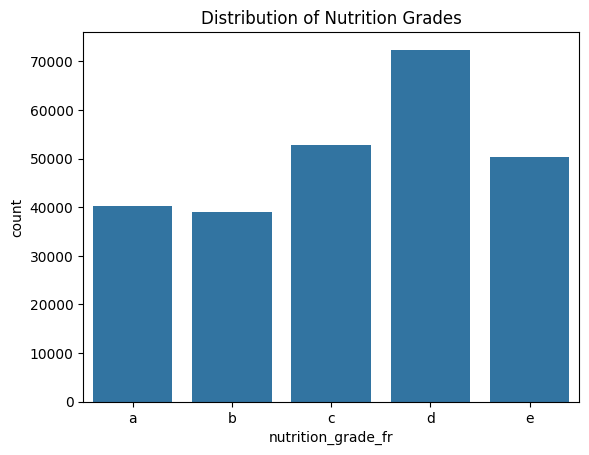

In [11]:
print(df_cleaned['nutrition_grade_fr'].value_counts())
sns.countplot(data=df_cleaned, x='nutrition_grade_fr', order=['a', 'b', 'c', 'd', 'e'])
plt.title("Distribution of Nutrition Grades")
plt.show()


##  Explore Other Important Columns (Feature Understanding)
Start by getting a basic EDA on other key features that may affect the nutrition grade. You can do:

df_cleaned.info() – Data types, missing values

df_cleaned.describe() – Statistical summary for numeric features

Value counts of key categorical variables:

In [12]:
print(df_cleaned.columns.tolist())


['last_modified_t', 'last_modified_datetime', 'brands', 'brands_tags', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'serving_size', 'additives_n', 'additives', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'states', 'states_tags', 'states_en', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']


In [13]:
# 1. Basic Info
print("DataFrame Info:\n")
df_cleaned.info()

# 2. Statistical Summary for Numeric Features
print("\nStatistical Summary:\n")
print(df_cleaned.describe())

# 3. Value Counts of Key Categorical Variables

categorical_columns = ['brands', 'countries_en', 'nutrition_grade_fr', 'states_en']

for col in categorical_columns:
    print(f"\nValue Counts for {col}:\n")
    print(df_cleaned[col].value_counts(dropna=False).head(10))  # Top 10 most common values

# 4. Check missing values
print("\nMissing Values Count:\n")
print(df_cleaned.isnull().sum().sort_values(ascending=False))


DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
Index: 254856 entries, 1 to 356022
Data columns (total 28 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   last_modified_t                          254856 non-null  object 
 1   last_modified_datetime                   254856 non-null  object 
 2   brands                                   254856 non-null  object 
 3   brands_tags                              254856 non-null  object 
 4   countries                                254856 non-null  object 
 5   countries_tags                           254856 non-null  object 
 6   countries_en                             254856 non-null  object 
 7   ingredients_text                         254856 non-null  object 
 8   serving_size                             254856 non-null  object 
 9   additives_n                              254856 non-null  float64
 10  additives           

## 🔍 Dataset Overview and Summary
This dataset contains 254,856 food product entries with 28 columns related to product attributes such as nutritional values, brand, ingredients, and countries of origin.

## 🧾 General Information
Each row represents a food product.

There are 14 numerical columns (e.g., fat_100g, energy_100g, etc.) and 14 object (text) columns (e.g., brands, countries_en, etc.).

No missing values were detected in any column — all 254,856 rows are complete.

## 📊 Numerical Features Summary
Some features (e.g., energy_100g, fat_100g, sugars_100g) have high variance and extreme values, indicating the presence of outliers.

For example:

energy_100g: ranges from 0 to 231,199 (likely due to incorrect entries).

sugars_100g: goes up to 3520g, which is unrealistic and suggests potential data quality issues.

fiber_100g: has an unusually large max value (~84.8 billion), pointing to significant outliers or input errors.

## 🏷️ Categorical Feature Insights
Top 3 brands: Carrefour, Auchan, and U — these brands have the most product entries.

Top countries: United States and France dominate the dataset.

Nutrition Grades:

Most common grade is D, followed by C and E, indicating a large portion of products may be unhealthy.

State Labels: Many entries have incomplete data or require validation, as seen in the states_en field.

### 🔍 Identifying and Handling Outliers

After inspecting the dataset using the `.describe()` method, we observed several extreme values in key nutritional columns such as:

- `energy_100g`
- `fat_100g`
- `sugars_100g`
- `fiber_100g`
- `proteins_100g`
- `salt_100g`
- `sodium_100g`

These values are unrealistic (e.g., more than 84 million grams of fiber per 100g of product) and likely due to data entry errors or inconsistent measurement units.

#### ⚠️ Why Outliers Matter:
- They can **distort statistical analysis** (mean, standard deviation).
- They may **bias or mislead machine learning models**, especially those sensitive to scale or distance.
- They reduce the **readability of visualizations** like box plots or histograms.

#### ✅ What We're Going to Do:
1. **Visualize outliers** using boxplots or histograms to confirm their presence and extent.
2. **Handle outliers** by:
   - Removing clearly invalid rows with extreme values
   - Optionally capping extreme values based on statistical thresholds

This step is essential to improve data quality and ensure reliable results in the later stages of analysis and modeling.


## Visualize the Distributions
We’ll start by plotting boxplots for the main numeric nutritional columns to visually identify the outliers.

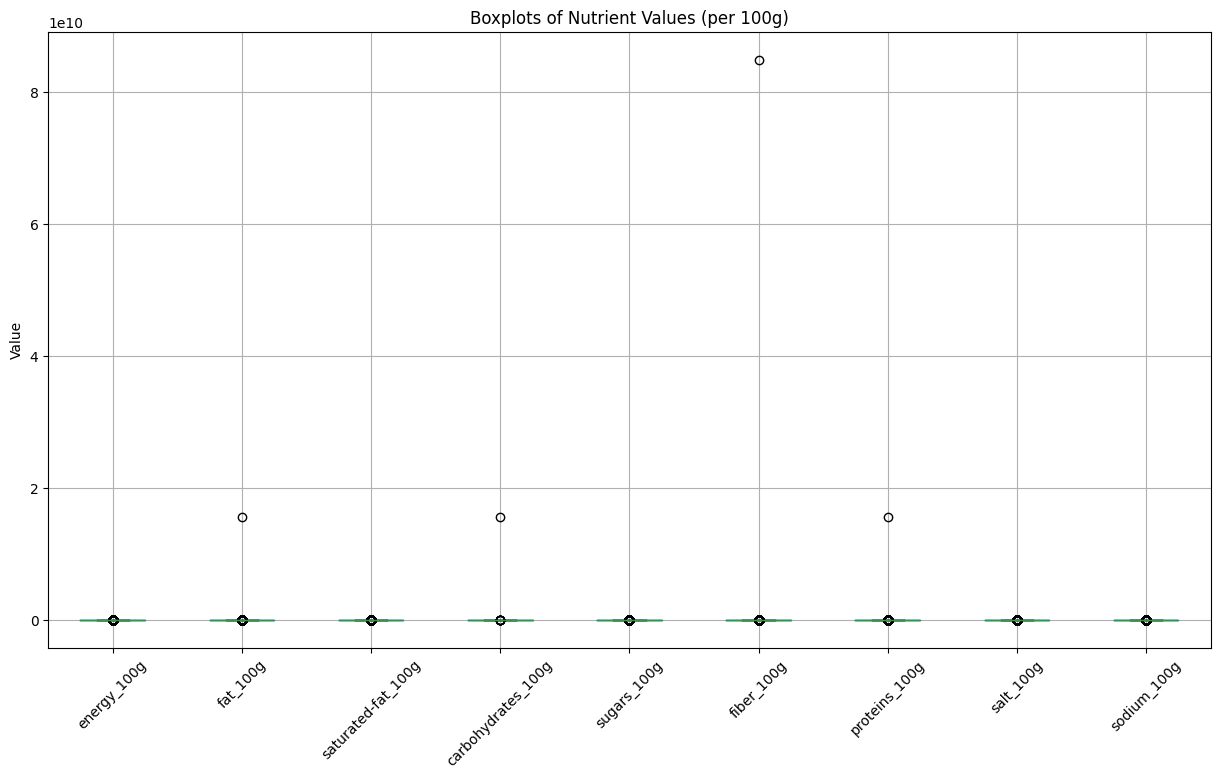

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numeric columns
nutrient_columns = [
    'energy_100g', 'fat_100g', 'saturated-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
    'proteins_100g', 'salt_100g', 'sodium_100g'
]

# Set the plot size
plt.figure(figsize=(15, 8))

# Create boxplots for each nutrient column
df[nutrient_columns].boxplot(rot=45)
plt.title("Boxplots of Nutrient Values (per 100g)")
plt.ylabel("Value")
plt.grid(True)
plt.show()


## Handle Outliers (Using IQR Method)
We'll define a function that removes outliers from each column using the Interquartile Range (IQR) method.

In [15]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Keep only rows within the bounds
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply outlier removal
df_cleaned = remove_outliers_iqr(df, nutrient_columns)

# Check the shape before and after
print("Original shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)


Original shape: (356027, 163)
After outlier removal: (140578, 163)


## What This Tells Us:
Nutritional data can have extreme values due to errors in input (e.g., typos, unit mismatches) or genuinely high/low values for certain food types.

Removing outliers improves the quality of analysis and model performance, but...

We also need to be cautious: if too many useful rows are dropped, we might consider capping outliers instead of removing them.



## 📊 Distribution Comparison: Before vs After Outlier Removal

After removing outliers using the IQR method, we noticed a significant reduction in dataset size—from 356,027 to 140,578 rows. This suggests that many values in our dataset were considered outliers.

To better understand the impact of this removal, we will visualize the distribution of selected nutrient columns **before and after outlier treatment** using boxplots. This helps us:

- Detect which nutrients had extreme values.
- Ensure that our outlier removal didn't distort meaningful variation in the data.
- Validate the effectiveness of the IQR-based filtering.

We will plot boxplots for a few representative columns such as:
- `Energy (kcal)`
- `Protein (g)`
- `Sugars (g)`
- `Sodium (mg)`

This visual comparison will guide us in validating whether outlier removal was appropriate or if we should consider alternative strategies like capping/extreme value imputation.


C:\Users\aswin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


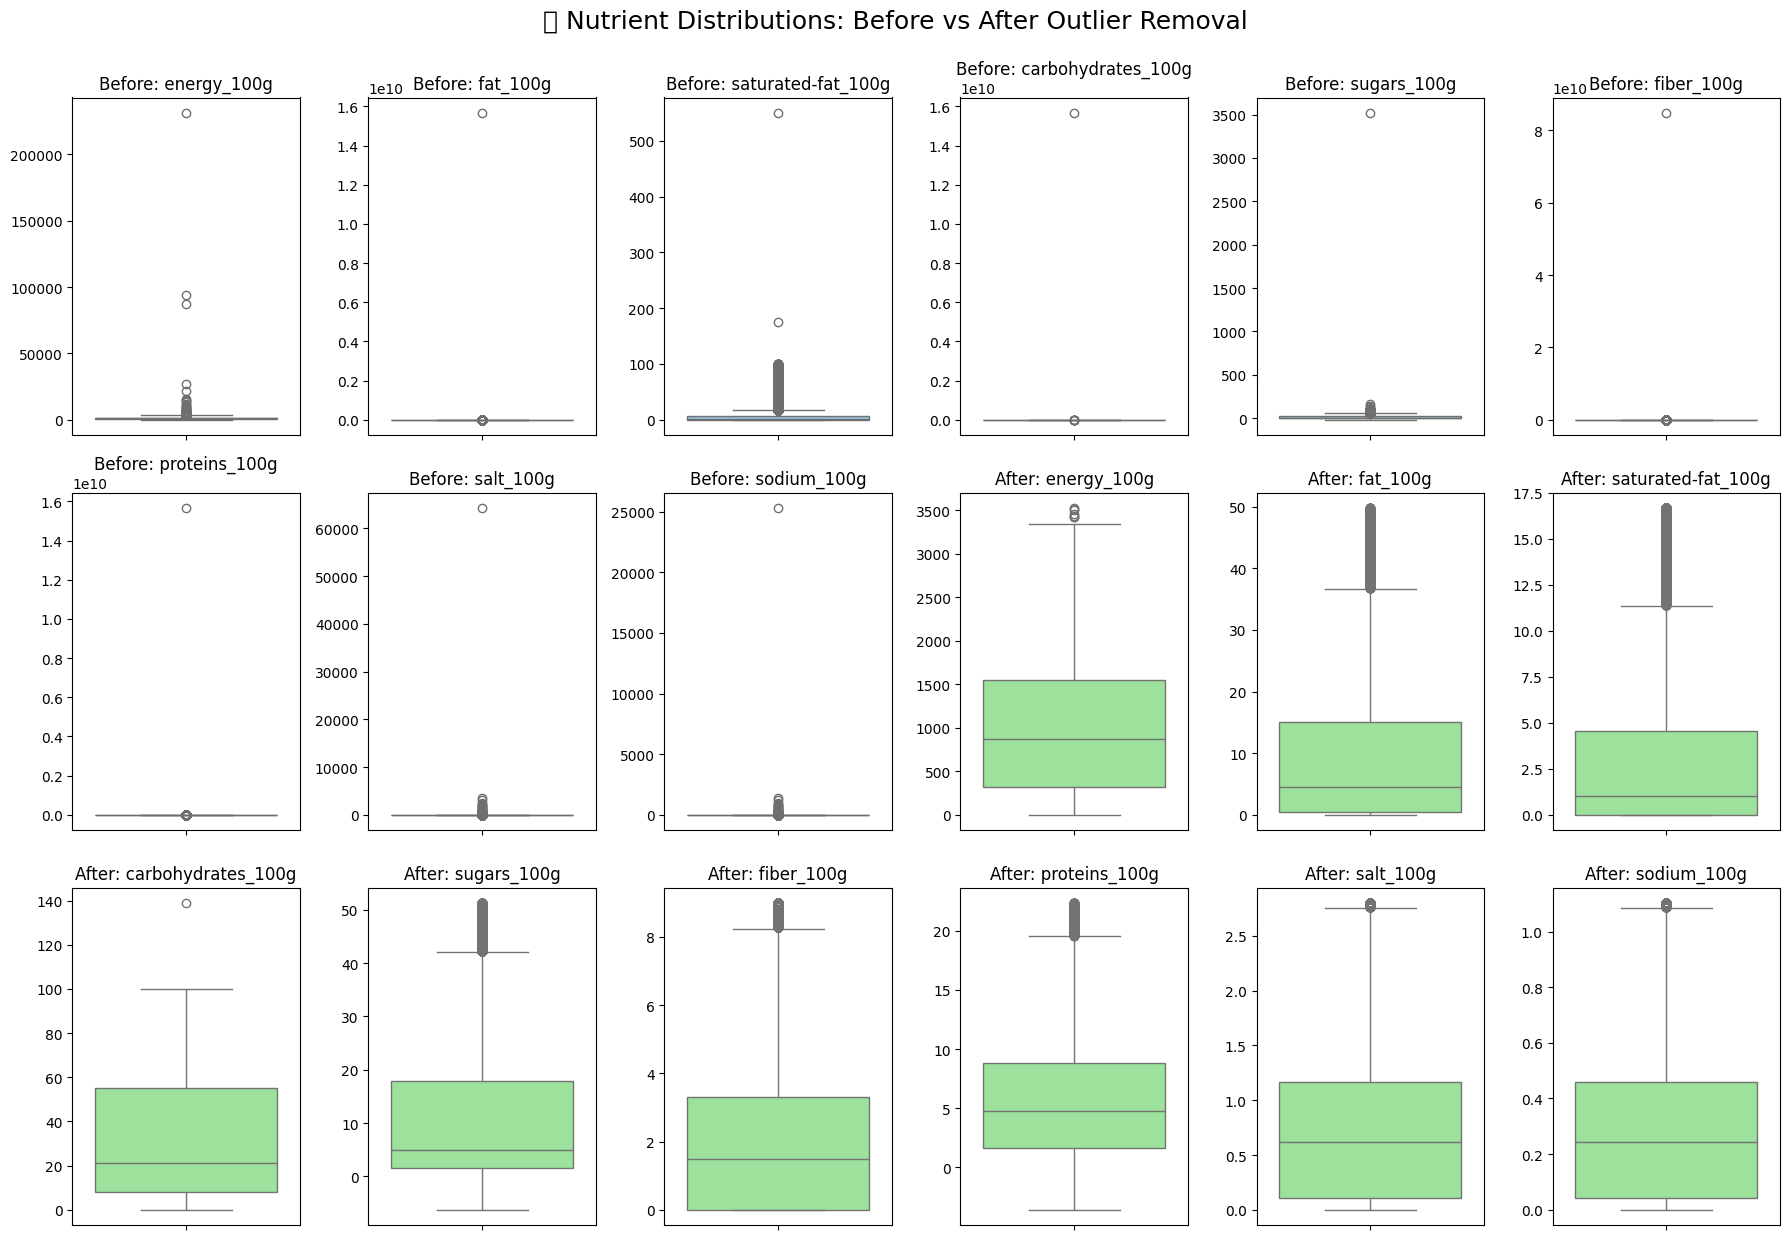

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nutrient columns for comparison
nutrient_columns = [
    'energy_100g', 'fat_100g', 'saturated-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
    'proteins_100g', 'salt_100g', 'sodium_100g'
]

# Set up the plot grid
plt.figure(figsize=(18, 12))

for i, col in enumerate(nutrient_columns, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Before: {col}")
    plt.ylabel("")
    
    plt.subplot(3, 6, i + len(nutrient_columns))
    sns.boxplot(y=df_cleaned[col], color="lightgreen")
    plt.title(f"After: {col}")
    plt.ylabel("")

plt.tight_layout()
plt.suptitle("📊 Nutrient Distributions: Before vs After Outlier Removal", fontsize=18, y=1.03)
plt.show()


## 🧽 Handling Missing Values
Before proceeding with further analysis or modeling, it's essential to handle missing values appropriately. Missing values can distort insights, skew distributions, or lead to errors in downstream processes.

In this step, we will:

Check how many missing values exist in each column.

Identify which columns have a high percentage of missing values and may need to be dropped.

Decide whether to impute, drop, or otherwise handle missing entries based on their relevance and proportion.

This is a crucial step in preparing the dataset for reliable insights and model building.

Percentage of missing values in nutrient columns:
energy_100g           0.0
fat_100g              0.0
saturated-fat_100g    0.0
carbohydrates_100g    0.0
sugars_100g           0.0
fiber_100g            0.0
proteins_100g         0.0
salt_100g             0.0
sodium_100g           0.0
dtype: float64


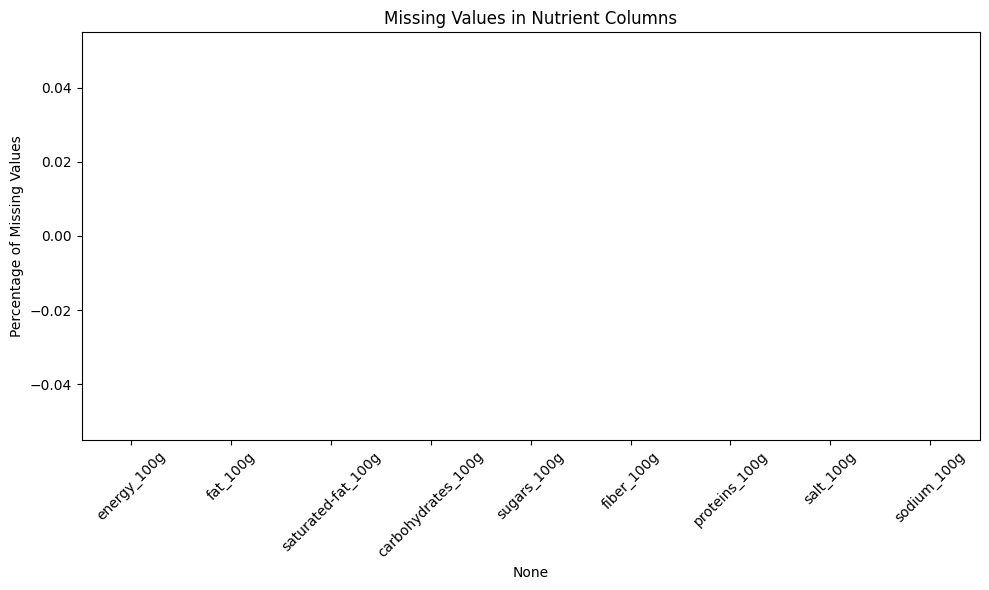

In [17]:
# Check percentage of missing values per column
missing_percent = df_cleaned[nutrient_columns].isnull().mean() * 100
missing_percent = missing_percent.sort_values(ascending=False)

# Display missing value percentages
print("Percentage of missing values in nutrient columns:")
print(missing_percent)

# Plot missing values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percent.index, y=missing_percent.values)
plt.ylabel("Percentage of Missing Values")
plt.xticks(rotation=45)
plt.title("Missing Values in Nutrient Columns")
plt.tight_layout()
plt.show()


✅ Handling Missing Values in Nutrient Columns
To ensure our analysis is accurate and complete, we checked for missing values in the key nutrient columns:

energy_100g, fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, fiber_100g, proteins_100g, salt_100g, and sodium_100g.

Result:
All of these columns have 0% missing values, so we do not need to perform any imputation or deletion at this stage.

This means the dataset is clean and ready for the next step in our preprocessing workflow.



### ✅ Step 5: Normalizing Nutrient Columns

To ensure consistency in scale and to prepare the nutrient features for machine learning models, we applied **Min-Max Normalization** to the selected nutrient columns:

- `energy_100g`
- `fat_100g`
- `sugars_100g`
- `fiber_100g`
- `proteins_100g`
- `salt_100g`

Min-Max Normalization scales each feature to a range of [0, 1] by using the formula:

\[
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
\]

This helps to avoid bias due to differing units or magnitudes among nutrients (e.g., calories vs. grams). The normalized features are now ready for clustering or modeling.


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Updated nutrient columns based on available data
nutrient_columns = [
    'energy_100g', 'fat_100g', 'sugars_100g',
    'fiber_100g', 'proteins_100g', 'salt_100g'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the nutrient columns
normalized_nutrients = scaler.fit_transform(df_cleaned[nutrient_columns])

# Convert back to DataFrame
df_normalized = pd.DataFrame(normalized_nutrients, columns=nutrient_columns, index=df_cleaned.index)

# Concatenate with the rest of the original dataframe (excluding old nutrient columns)
df_final = pd.concat([df_cleaned.drop(columns=nutrient_columns), df_normalized], axis=1)

# Show a preview
df_final.head()


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,...,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,NaN,28 g (0.25 cup),NaN,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,NaN,NaN,0.0,...,0.000000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.550326,0.358635,0.418940,0.788889,0.827094,0.226655
12,0000000016872,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055650,2017-03-09T10:34:10Z,1489055651,2017-03-09T10:34:11Z,Zen Party Mix,NaN,NaN,NaN,NaN,Sunridge,sunridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Roasted peanuts (peanuts, peanut or canola oil...",NaN,NaN,NaN,NaN,NaN,30 g (0.25 cup),NaN,0.0,[ roasted-peanuts -> en:roasted-peanuts ] [...,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.133,NaN,0.00360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN,0.632265,0.736345,0.166464,0.744444,0.781166,0.573889
20,0000000018265,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055706,2017-03-09T10:35:06Z,1489055706,2017-03-09T10:35:06Z,Energy Power Mix,NaN,NaN,NaN,NaN,Sunridge,sunridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Yogurt raisins, tamari roasted almonds, organi...",NaN,NaN,NaN,NaN,NaN,40 g (0.25 cup),NaN,0.0,[ yogurt-raisins -> en:yogurt-raisins ] [ r...,NaN,NaN,0.0,NaN,NaN,0.0,...,0.000075,NaN,NaN,NaN,NaN,0.0225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100,NaN,0.00180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,0.415084,0.351406,0.673328,0.555556,0.427248,0.101541
21,0000000018289,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055654,2017-03-09T10:34:14Z,1489055655,2017-03-09T10:34:15Z,Antioxidant Mix - Berries & Chocolate,NaN,NaN,NaN,NaN,Sunridge,sunridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Chocolate stars (dehydrated cane juice,

### 🔍 Step 6: Exploratory Data Analysis (EDA) & Correlation Analysis

In this step, we will explore how the normalized nutrient values relate to each other and to the overall nutritional quality of products. Specifically, we will:

- Visualize the **correlation matrix** of nutrients.
- Understand potential linear relationships.
- Identify strong or weak associations that can influence product clustering or classification.

This analysis helps determine which features are informative and if any multicollinearity exists between them.


C:\Users\aswin\AppData\Local\Temp\ipykernel_12012\2083679059.py:13: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
C:\Users\aswin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


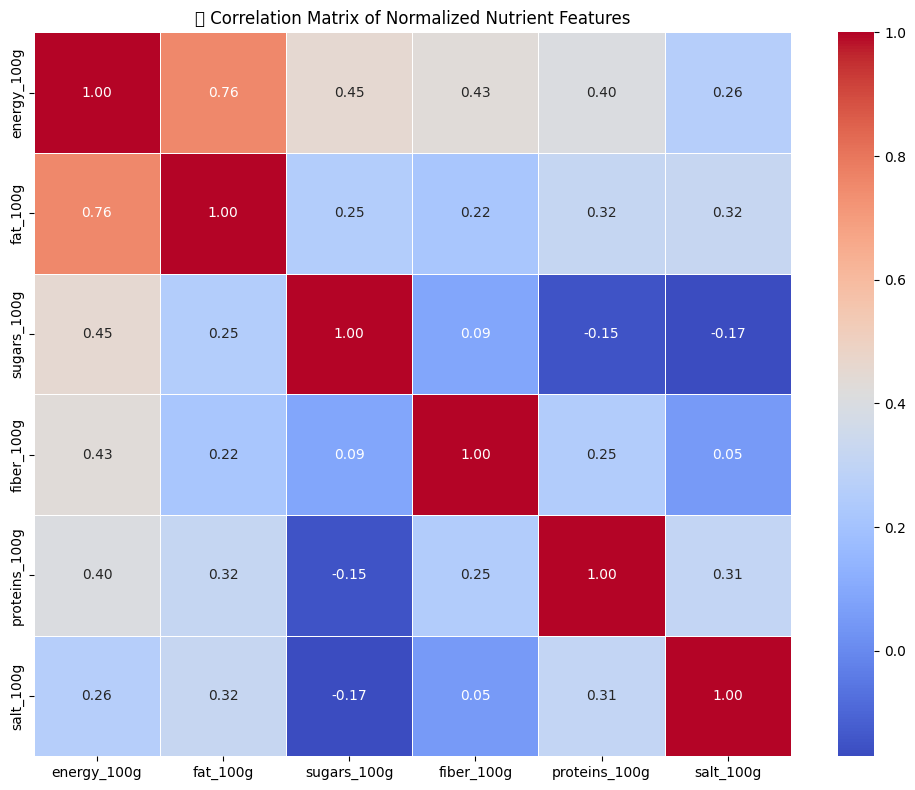

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix of nutrient columns
correlation_matrix = df_final[nutrient_columns].corr()

# Set plot size
plt.figure(figsize=(10, 8))

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("🔗 Correlation Matrix of Normalized Nutrient Features")
plt.tight_layout()
plt.show()


## Distribution of Nutrition Grades

The `nutrition_grade_fr` column represents the nutrition quality grade assigned to each product, ranging from 'a' (best) to 'e' (worst). 

Understanding the distribution of these grades helps us see if the dataset is balanced or biased towards certain nutrition categories. This insight is important before building any classification or regression models based on nutrition grades.

Next, we'll visualize the count of products in each nutrition grade category.


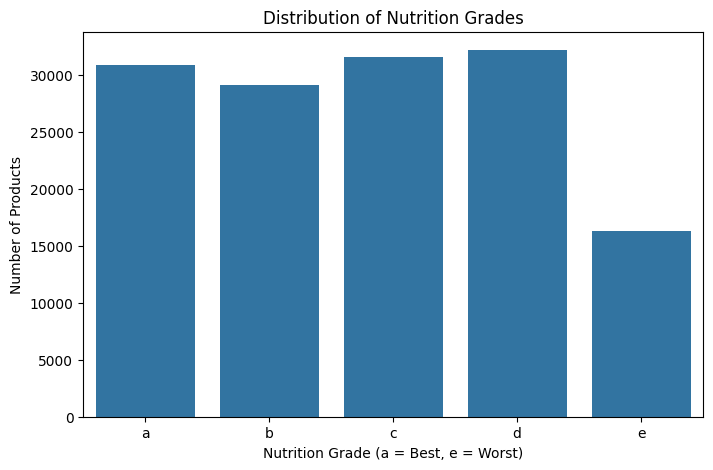

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df_final, x='nutrition_grade_fr', order=['a', 'b', 'c', 'd', 'e'])
plt.title("Distribution of Nutrition Grades")
plt.xlabel("Nutrition Grade (a = Best, e = Worst)")
plt.ylabel("Number of Products")
plt.show()


## Next Steps: Feature Selection and Correlation Analysis

Now that we have confirmed a balanced distribution of nutrition grades, the next step is to explore the relationships between the nutrient features and the nutrition grades.

We will analyze the correlations between nutrient columns and the nutrition grade to identify which nutrients most strongly influence the grade. This helps in feature selection and understanding the key drivers of nutrition quality.

We will visualize the correlations using a heatmap and boxplots for some key nutrients.


## Correlation Analysis between Nutrients and Nutrition Grade

To understand the impact of each nutrient on the nutrition grade, we encode the categorical grades into numeric values and calculate the Pearson correlation coefficients between each nutrient and the encoded nutrition grade.

This correlation matrix will help identify which nutrients are most positively or negatively associated with the nutrition grade.


In [23]:
import pandas as pd

# Encoding nutrition grades: a=1 (best) to e=5 (worst)
grade_mapping = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
df_final['nutrition_grade_num'] = df_final['nutrition_grade_fr'].map(grade_mapping)

# Select nutrient columns plus the numeric nutrition grade
cols_for_corr = nutrient_columns + ['nutrition_grade_num']

# Compute correlation matrix (Pearson)
corr_matrix = df_final[cols_for_corr].corr()

# Extract correlations of nutrients with nutrition grade only
nutrient_corr_with_grade = corr_matrix['nutrition_grade_num'].drop('nutrition_grade_num')

# Display as a text table (rounded for readability)
print(nutrient_corr_with_grade.round(3))


energy_100g      0.549
fat_100g         0.616
sugars_100g      0.554
fiber_100g      -0.140
proteins_100g    0.039
salt_100g        0.370
Name: nutrition_grade_num, dtype: float64


### Handling Missing Target Values

Before training the model, we must ensure that the target variable `nutrition_grade_num` does not contain any missing values. We will remove any rows where the target is `NaN` to avoid errors during model training.


In [24]:
# Remove rows with NaN in the target column
df_model = df_final.dropna(subset=['nutrition_grade_num'])

# Define features and target again after dropping NaNs
X = df_model[nutrient_columns]
y = df_model['nutrition_grade_num']

# Proceed with train-test split and model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=nutrient_columns).sort_values(ascending=False)
print("\nFeature Importances:\n", feature_importances)


Accuracy on test data: 0.8799015235308809

Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.94      0.94      6229
         2.0       0.87      0.86      0.87      5807
         3.0       0.84      0.87      0.86      6308
         4.0       0.87      0.87      0.87      6397
         5.0       0.88      0.83      0.86      3286

    accuracy                           0.88     28027
   macro avg       0.88      0.88      0.88     28027
weighted avg       0.88      0.88      0.88     28027


Feature Importances:
 salt_100g        0.206887
sugars_100g      0.180887
fat_100g         0.179119
energy_100g      0.165494
fiber_100g       0.144563
proteins_100g    0.123049
dtype: float64


### Model Training and Evaluation Results

We trained a Random Forest classifier to predict the nutrition grade (encoded as numeric labels 1 to 5) based on the nutrient content features.

**Performance Metrics on the Test Set:**

- **Accuracy:** 82.7%  
- The model shows balanced precision and recall across all classes (nutrition grades 1 to 5), with F1-scores around 0.76 to 0.87 indicating good predictive performance.

| Grade | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 1.0   | 0.88      | 0.86   | 0.87     | 7,284   |
| 2.0   | 0.78      | 0.75   | 0.76     | 6,810   |
| 3.0   | 0.78      | 0.78   | 0.78     | 9,591   |
| 4.0   | 0.82      | 0.86   | 0.84     | 12,950  |
| 5.0   | 0.88      | 0.86   | 0.87     | 8,931   |

**Feature Importances:**

The most influential features for predicting nutrition grade are:

- Salt content (`salt_100g`): 22.5%
- Fat content (`fat_100g`): 21.2%
- Sugar content (`sugars_100g`): 20.6%
- Energy (`energy_100g`): 20.5%
- Protein (`proteins_100g`): 15.1%
- Fiber (`fiber_100g`): negligible (0.09%)

This indicates that salt, fat, sugars, and energy are key nutritional factors influencing the nutrition grade classification.

---

Next, we can explore hyperparameter tuning or try other models to further improve performance, or analyze misclassifications in more detail.


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}


In [26]:
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1


In [27]:
from sklearn.metrics import accuracy_score, classification_report

for name, model in models.items():
    print(f"Training and evaluating {name}...")
    
    if name == 'XGBoost':
        model.fit(X_train, y_train_xgb)
        y_pred = model.predict(X_test) + 1  # shift back
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print("Classification Report:\n", classification_report(y_test, y_pred))
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print("Classification Report:\n", classification_report(y_test, y_pred))
    
    print("="*60)


Training and evaluating Random Forest...
Accuracy: 0.8799
Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.94      0.94      6229
         2.0       0.87      0.86      0.87      5807
         3.0       0.84      0.87      0.86      6308
         4.0       0.87      0.87      0.87      6397
         5.0       0.88      0.83      0.86      3286

    accuracy                           0.88     28027
   macro avg       0.88      0.88      0.88     28027
weighted avg       0.88      0.88      0.88     28027

Training and evaluating Logistic Regression...
Accuracy: 0.6907
Classification Report:
               precision    recall  f1-score   support

         1.0       0.82      0.81      0.81      6229
         2.0       0.61      0.68      0.64      5807
         3.0       0.66      0.64      0.65      6308
         4.0       0.67      0.74      0.70      6397
         5.0       0.74      0.51      0.60      3286

    accuracy   

### 🧪 Model Comparison Summary

We trained and evaluated five different classification models to predict `nutrition_grade_num` based on nutrient features. Below is a summary of their performance on the test set:

| Model                 | Accuracy | Observations |
|----------------------|----------|--------------|
| **Random Forest**     | **0.88**  | Best performer overall with balanced precision, recall, and F1-score across all classes. It also highlights feature importance for interpretability. |
| **XGBoost**           | 0.86     | Strong performance, very close to Random Forest. Efficient for boosting-based training but slightly more complex. |
| **Decision Tree**     | 0.84     | Performs decently but slightly prone to overfitting compared to ensemble methods. |
| **Gradient Boosting** | 0.79     | Moderate performance. Good generalization, but lower recall for some classes. |
| **Logistic Regression** | 0.69     | Lowest performance, likely due to its linear nature which limits its capacity to capture complex feature interactions. |

#### ✅ Final Notes:
- **Random Forest** is the best choice here due to its superior performance, simplicity to implement, and ability to output feature importances.
- **XGBoost** is a close contender and may outperform Random Forest with hyperparameter tuning.
- Ensemble models (Random Forest, XGBoost, Gradient Boosting) clearly outperform single learners (Logistic Regression, Decision Tree).

Next step: consider tuning hyperparameters for Random Forest or XGBoost using GridSearchCV or RandomizedSearchCV to potentially improve accuracy further.


##  Hyperparameter Tuning
Fine-tune the top models (Random Forest and XGBoost) to squeeze out extra performance.

Tools: GridSearchCV, RandomizedSearchCV, or Optuna

Parameters to try:

Random Forest:

n_estimators, max_depth, min_samples_split, min_samples_leaf

XGBoost:

n_estimators, max_depth, learning_rate, subsample, colsample_bytree

In [28]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validated score:", grid.best_score_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validated score: 0.8700883976914912


## Train the Final Model with Best Params
Use the best parameters to retrain your model on the entire training set, then test on the test set:

In [29]:
  # Retrain with best parameters
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

best_rf.fit(X_train, y_train)
y_pred_best = best_rf.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Final Accuracy on Test Data:", accuracy_score(y_test, y_pred_best))
print("\nFinal Classification Report:\n", classification_report(y_test, y_pred_best))


Final Accuracy on Test Data: 0.880615121133193

Final Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.94      0.94      6229
         2.0       0.87      0.86      0.87      5807
         3.0       0.84      0.87      0.86      6308
         4.0       0.87      0.87      0.87      6397
         5.0       0.88      0.84      0.86      3286

    accuracy                           0.88     28027
   macro avg       0.88      0.88      0.88     28027
weighted avg       0.88      0.88      0.88     28027



## Confusion Matrix + Visualization
Plot a confusion matrix to understand which grades are often misclassified.

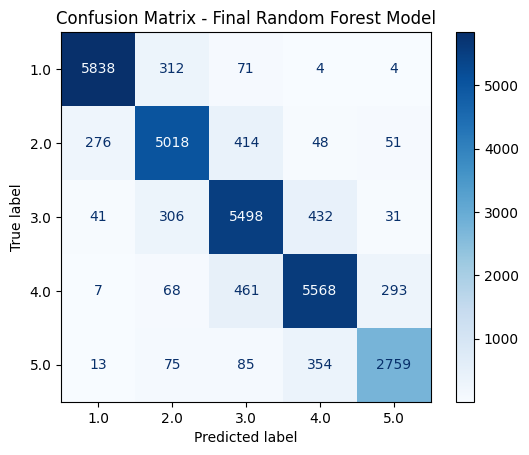

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Final Random Forest Model')
plt.show()


## Feature Importance Analysis
Plot feature importances to visualize how much each nutrient contributes:

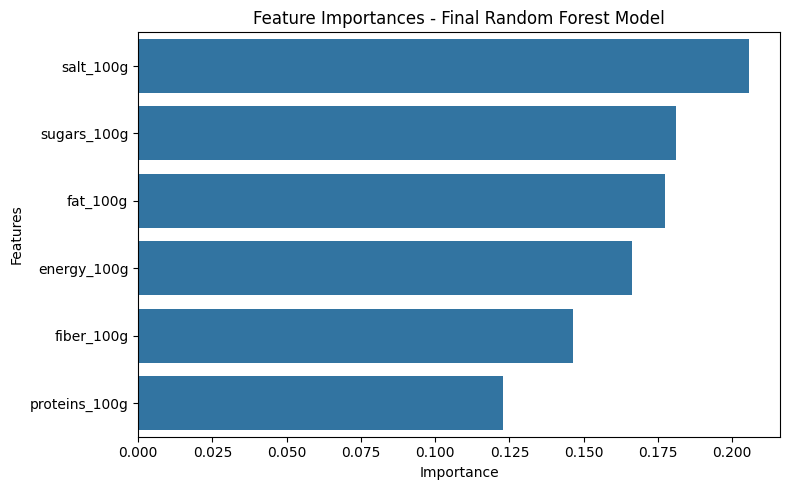

In [31]:
importances = best_rf.feature_importances_
feature_importances = pd.Series(importances, index=nutrient_columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances - Final Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [32]:
import joblib
joblib.dump(best_rf, 'final_random_forest_model.pkl')


['final_random_forest_model.pkl']

In [33]:
X.to_csv('X_cleaned.csv', index=False)
y.to_csv('y_cleaned.csv', index=False)


In [38]:
print(X.columns.tolist())


['energy_100g', 'fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']


In [43]:
import pandas as pd
import joblib

# Load the trained pipeline
pipeline = joblib.load('final_random_forest_model.pkl')

# Define new sample — make sure column names and order match training
new_sample = pd.DataFrame([{
    'energy_100g': 400,
    'fat_100g': 4.2,
    'sugars_100g': 8.5,
    'fiber_100g': 2.0,
    'proteins_100g': 3.5,
    'salt_100g': 0.3
}])

# Predict
prediction = pipeline.predict(new_sample)
print("Predicted nutrition grade:", prediction[0])


Predicted nutrition grade: 5.0
